In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math 
from scipy import stats as ss

df = pd.read_csv('Data\mental-heath-in-tech-2016_20161114.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\1618905548.py:8: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('Data\mental-heath-in-tech-2016_20161114.csv')


Data Exploration

In [2]:
# Step 1: Data Exploration
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/orga

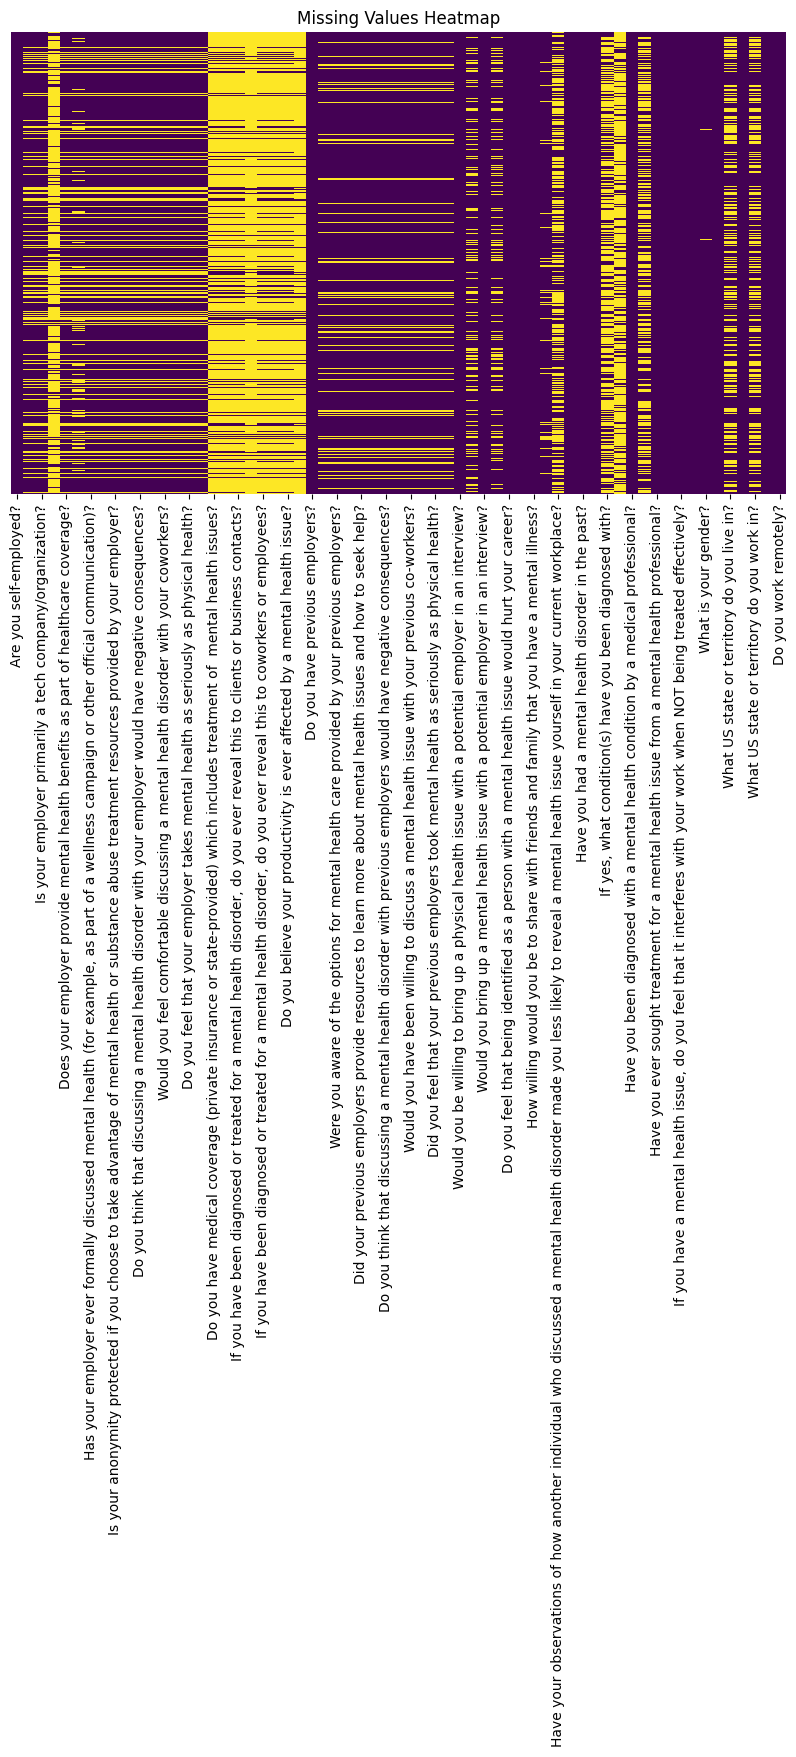


Descriptive Statistics for Numerical Columns:
       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to t

In [3]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Descriptive statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

In [4]:
#Fix erraneous inputs - Reassign values to Male, Female, or Other
df['What is your gender?'].replace(['male', 'm','M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male',
                                   'Cis Male', 'cis male', 'cis man', 'mail', 'Male (trans, FtM)', 'MALE', 
                                   'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male',
                                   'man', 'male ', 'M|','Male ',
                                    'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '], 
                                   'Male', inplace = True)

df['What is your gender?'].replace(['Female', 'female', 'I identify as female.', 'female ',
                                    'Female assigned at birth ', 'Cis female ', 'Transitioned, M2F',
                                    'Female or Multi-Gender Femme', 'woman', 'female/woman',
                                    'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
                                    ' Female', 'Cis-woman', 'Female ', 'F', 'Woman', 'fm', 'f'], 'Female', inplace = True)
df['What is your gender?'].replace(['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary',
                                    'AFAB', 'Agender', 'genderqueer', 'Genderflux demi-girl', 'mtf', 'Genderqueer',
                                   'Transgender woman', 'Other/Transfeminine', 'human', 'Queer', 'Unicorn',
                                   'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business',
                                   'Bigender', 'Enby', 'genderqueer woman', 'Nonbinary','male 9:1 female, roughly',
                                    'Human'], 'Other', inplace = True)
#Change outlier age of 323 to be the average age to still use the information from the row
#df.loc[(df['What is your age?'] == 323)]
df.at[564, 'What is your age?'] = df['What is your age?'].mean()

C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\4135940420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['What is your gender?'].replace(['male', 'm','M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male',
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\4135940420.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.28611304954641' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
 

In [5]:
df1 = df.copy()

Data Selection

In [6]:
# Select only participants working for a company
df1 = df1.loc[(df1['Are you self-employed?'] == 0)]
df1 = df1.reset_index(drop = True)

# Select only participants working for a tech company
df1 = df1.loc[(df1['Is your employer primarily a tech company/organization?'] == 1)]
df1 = df1.reset_index(drop = True)

# Select only participants living in the US
df1 = df1.loc[(df1['What country do you live in?'] == 'United States of America')]
df1 = df1.reset_index(drop = True)

# Select only participants working in the US
df1 = df1.loc[(df1['What country do you work in?'] == 'United States of America')]
df1 = df1.reset_index(drop = True)

In [7]:
#Population size
print('Number of respondents working for a tech companyin the US is ' + str(len(df1)) + '.')

Number of respondents working for a tech companyin the US is 539.


Analysis

In [8]:
#How many people have a MHC in our selection? 
df1['Do you currently have a mental health disorder?'].value_counts()

Do you currently have a mental health disorder?
Yes      250
No       174
Maybe    115
Name: count, dtype: int64

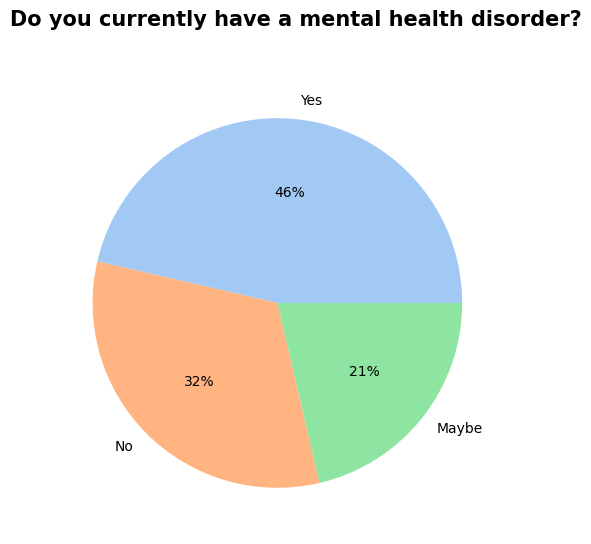

In [9]:
#What are the proportions?
counts = df1['Do you currently have a mental health disorder?'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
counts

plt.figure(figsize=(12, 6))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(counts['count'], labels = counts['Do you currently have a mental health disorder?'], colors = colors, autopct='%.0f%%')
plt.text(.1, 1.5, 'Do you currently have a mental health disorder?',weight='bold',horizontalalignment='center',fontsize=15)
plt.show()

In [10]:
#Create separate columns for presence of each MHC for easier filter
df1['Anxiety Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')
df1['Mood Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Mood Disorder')
df1['ADHD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')
df1['OCD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')
df1['PTSD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')
df1['PTSD undiagnosed'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
df1['Eating Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Eating')
df1['Substance Use Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Substance')
df1['Stress Response Syndrome'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Stress Response')
df1['Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Personality Disorder')
df1['Pervasive Developmental Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Pervasive')
df1['Psychotic Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Psychotic')
df1['Addictive Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Addictive Disorder')
df1['Dissociative Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Dissociative')
df1['Seasonal Affective Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Seasonal')
df1['Schizotypal Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Schizotypal')
df1['Traumatic Brain Injury'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Brain')
df1['Sexual Addiction'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Sexual')
df1['Autism'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Autism')
df1['ADD w/o Hyperactivity)'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')

<>:7: SyntaxWarning: invalid escape sequence '\('
<>:21: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\('
<>:21: SyntaxWarning: invalid escape sequence '\('
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\3278757815.py:7: SyntaxWarning: invalid escape sequence '\('
  df1['PTSD undiagnosed'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\3278757815.py:21: SyntaxWarning: invalid escape sequence '\('
  df1['ADD w/o Hyperactivity)'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')


In [11]:
#create dfs to 4 population types, no mental conditions, at least both anxiety & depression, 
#at least ADHD, and at least OCD
df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]

In [12]:


#Display population size of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD']
df_group_values = [len(df1), len(df_no_MHD), len(df_anx_dep), 
                   len(df_adhd), len(df_ptsd), len(df_ocd)]

df_MHD_count = pd.DataFrame(columns = ['Population', 'Count'])
df_MHD_count['Population'] = df_group
df_MHD_count['Count'] = df_group_values
df_MHD_count



,Population,Count
0,Total Population,539
1,No MHC,174
2,Anxiety & Depression,106
3,ADHD,68
4,PTSD,28
5,OCD,25


Text(2, 1.15, 'Common MHCs in the Tech Workplace')

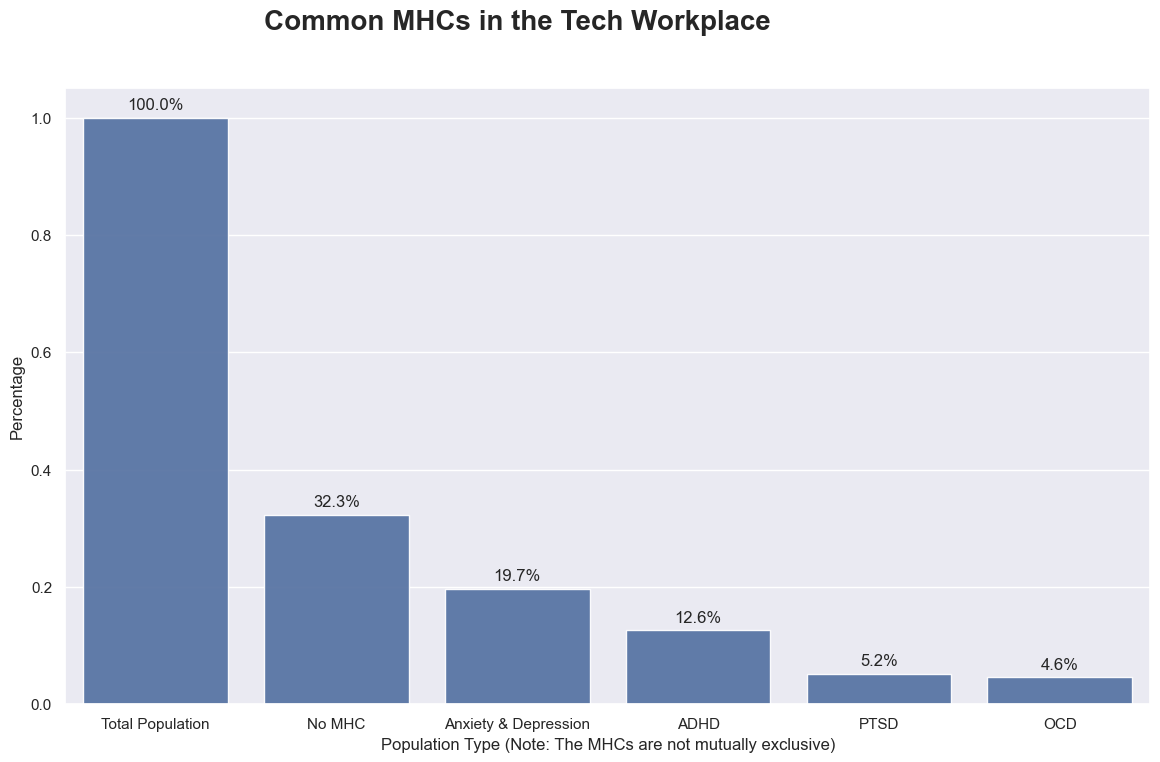

In [13]:
#Display proportions of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD','PTSD', 'OCD']
df_group_values = [len(df1)/len(df1), len(df_no_MHD)/len(df1), len(df_anx_dep)/len(df1), 
                   len(df_adhd)/len(df1),len(df_ptsd)/len(df1), len(df_ocd)/len(df1)]

#bar plot creation
sns.set(style="darkgrid")
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x = df_group, y = df_group_values,alpha =.95)
ax1.set(xlabel = 'Population Type (Note: The MHCs are not mutually exclusive)')
ax1.set(ylabel = 'Percentage')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.text(2, 1.15, 'Common MHCs in the Tech Workplace',weight='bold',
         horizontalalignment='center',fontsize=20)

Text(1.75, 1.15, 'Gender Distribution by MHC')

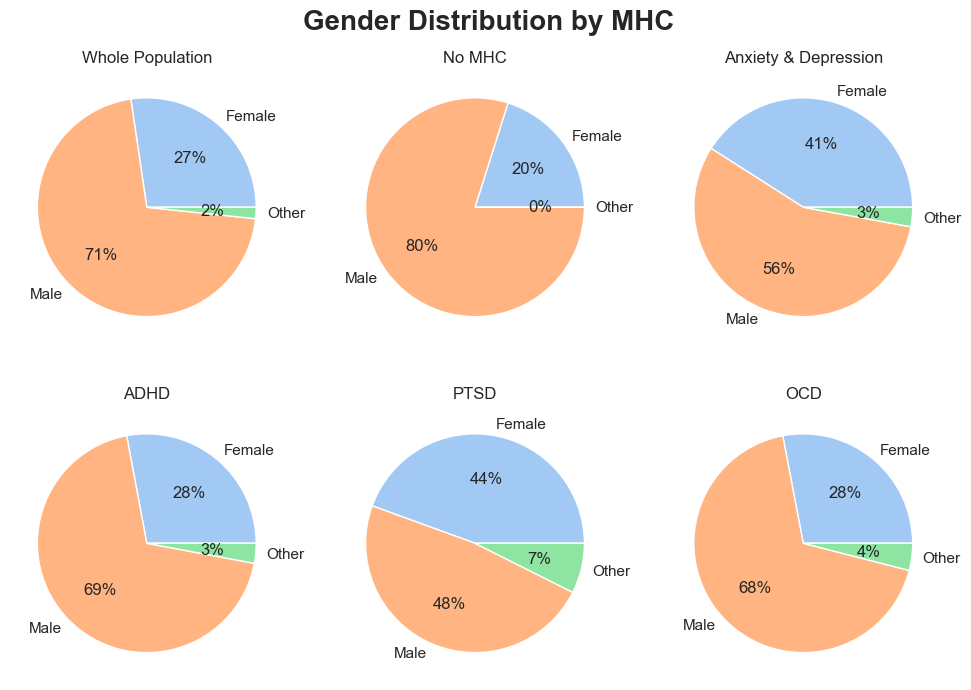

In [14]:
#Create cross tabulation table of counts by gender and MHC
#sort the general value count df
df1_sorted = df1['What is your gender?'].value_counts()
df1_sorted = df1_sorted.reset_index().rename(columns={"index": 'What is your gender?', 0: "count"})
df1_sorted = df1_sorted.sort_values(by=['What is your gender?']).reset_index(drop = True)

#Create sorted df for no MHC
counts_no_MHD = df_no_MHD['What is your gender?'].value_counts()
counts_no_MHD = counts_no_MHD.reset_index().rename(columns={"index": "What is your gender?", 0: "count"})
counts_no_MHD = counts_no_MHD.sort_values(by=['What is your gender?']).reset_index(drop = True)
counts_no_MHD.loc[len(counts_no_MHD.index)] = ['Other', 0] 

#Create sorted value count df for anxiety & depression population
counts_anx_dep = df_anx_dep['What is your gender?'].value_counts()
counts_anx_dep = counts_anx_dep.reset_index().rename(columns={"index": "What is your gender?", 0: "count"})
counts_anx_dep = counts_anx_dep.sort_values(by=['What is your gender?']).reset_index(drop = True)

#Create sorted value count df for ADHD population
counts_adhd = df_adhd['What is your gender?'].value_counts()
counts_adhd = counts_adhd.reset_index().rename(columns={"index": "What is your gender?", 0: "count"})
counts_adhd = counts_adhd.sort_values(by=['What is your gender?']).reset_index(drop = True)

#Create sorted value count df for PTSD population
counts_ptsd = df_ptsd['What is your gender?'].value_counts()
counts_ptsd = counts_ptsd.reset_index().rename(columns={"index": "What is your gender?", 0: "count"})
counts_ptsd = counts_ptsd.sort_values(by=['What is your gender?']).reset_index(drop = True)

#Create sorted value count df for OCD population
counts_ocd = df_ocd['What is your gender?'].value_counts()
counts_ocd = counts_ocd.reset_index().rename(columns={"index": "What is your gender?", 0: "count"})
counts_ocd = counts_ocd.sort_values(by=['What is your gender?']).reset_index(drop = True)


#Put dfs together and rename columns
df_gender = df1_sorted
df_gender = df_gender.rename(columns={"count": "What is your gender? (whole population)"})

df_gender['What is your gender? (no MHC)'] = counts_no_MHD['count']
df_gender['What is your gender? (Anxiety & Depression)'] = counts_anx_dep['count']
df_gender['What is your gender? (ADHD)'] = counts_adhd['count']
df_gender['What is your gender? (PTSD)'] = counts_ptsd['count']
df_gender['What is your gender? (OCD)'] = counts_ocd['count']

#Create pie charts
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

sns.set(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]

a = ax1.pie(df_gender['What is your gender? (whole population)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax1.set_title('Whole Population', fontsize=12)

b = ax2.pie(df_gender['What is your gender? (no MHC)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax2.set_title('No MHC', fontsize=12)

c = ax3.pie(df_gender['What is your gender? (Anxiety & Depression)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax3.set_title('Anxiety & Depression', fontsize=12)

d = ax4.pie(df_gender['What is your gender? (ADHD)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax4.set_title('ADHD', fontsize=12)

e = ax5.pie(df_gender['What is your gender? (PTSD)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax5.set_title('PTSD', fontsize=12)

f = ax6.pie(df_gender['What is your gender? (OCD)'], labels = df_gender['What is your gender?'], colors = colors, autopct='%.0f%%')
ax6.set_title('OCD', fontsize=12)

plt.text(1.75, 1.15, 'Gender Distribution by MHC',weight='bold',
         horizontalalignment='center',fontsize=20,transform = ax1.transAxes)

In [15]:
df_gender

,What is your gender?,What is your gender? (whole population),What is your gender? (no MHC),What is your gender? (Anxiety & Depression),What is your gender? (ADHD),What is your gender? (PTSD),What is your gender? (OCD)
0,Female,147,35,43,19,12,7
1,Male,382,139,59,47,13,17
2,Other,9,0,3,2,2,1


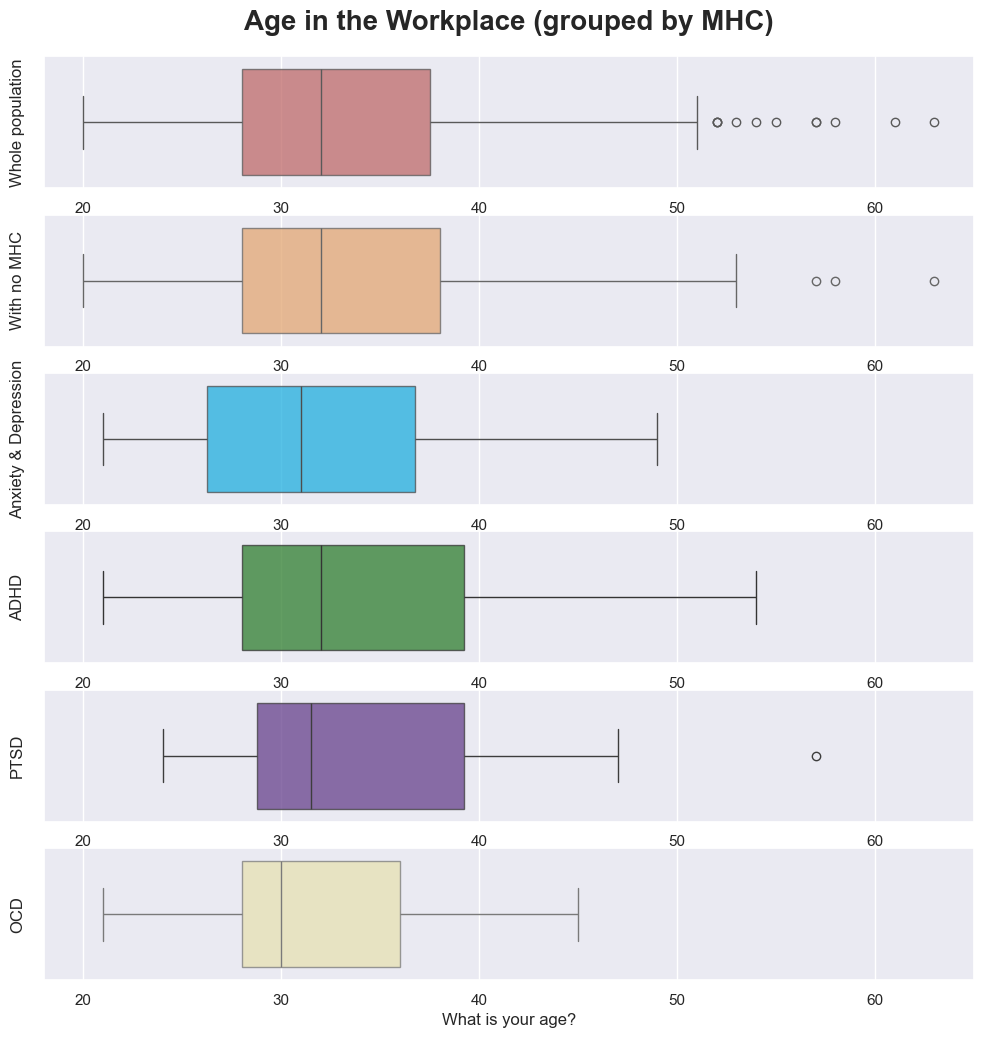

In [16]:
#Boxplots of each group
boxprops=dict(alpha=.75)
sns.set(style="darkgrid")

fig, axs = plt.subplots(6, 1, figsize=(12, 12))
(ax1, ax2, ax3, ax4, ax5, ax6)

ax1 = sns.boxplot(data = df1, x='What is your age?', color = 'indianred',ax = axs[0], boxprops=boxprops)
ax1.set_xlim(18,65)
ax1.set(ylabel = 'Whole population')

ax2 = sns.boxplot(data = df_no_MHD, x='What is your age?', color = 'sandybrown', ax = axs[1], boxprops=boxprops)
ax2.set_xlim(18,65)
ax2.set(ylabel = 'With no MHC')

ax3 = sns.boxplot(data = df_anx_dep, x='What is your age?', color = 'deepskyblue', ax = axs[2], boxprops=boxprops)
ax3.set_xlim(18,65)
ax3.set(ylabel = 'Anxiety & Depression')

ax4 = sns.boxplot(data = df_adhd, x='What is your age?', color = 'forestgreen', ax = axs[3], boxprops=boxprops)
ax4.set_xlim(18,65)
ax4.set(ylabel = 'ADHD')

ax5 = sns.boxplot(data = df_ptsd, x='What is your age?', color = 'rebeccapurple', ax = axs[4], boxprops=boxprops)
ax5.set_xlim(18,65)
ax5.set(ylabel = 'PTSD')

ax6 = sns.boxplot(data = df_ocd, x='What is your age?', color = 'palegoldenrod', ax = axs[5], boxprops=boxprops)
ax6.set_xlim(18,65)
ax6.set(ylabel = 'OCD')

plt.text(.5, 1.2, 'Age in the Workplace (grouped by MHC)', weight = 'bold', horizontalalignment = 'center',
         fontsize = 20,transform = ax1.transAxes)
plt.show()

In [17]:
#statistics of Age for each group
df_age_stats = pd.DataFrame({'Whole Population': df1['What is your age?'].describe()})
df_age_stats = df_age_stats.reset_index()
df_age_stats['No MHC'] = df_no_MHD['What is your age?'].describe().reset_index()['What is your age?']
df_age_stats['Anxiety & Depression'] = df_anx_dep['What is your age?'].describe().reset_index()['What is your age?']
df_age_stats['ADHD'] = df_adhd['What is your age?'].describe().reset_index()['What is your age?']
df_age_stats['PTSD'] = df_ptsd['What is your age?'].describe().reset_index()['What is your age?']
df_age_stats['OCD'] = df_ocd['What is your age?'].describe().reset_index()['What is your age?']

df_age_stats

,index,Whole Population,No MHC,Anxiety & Depression,ADHD,PTSD,OCD
0,count,539.000000,174.000000,106.000000,68.000000,28.000000,25.000000
1,mean,33.356746,33.547621,32.377358,33.764706,34.035714,32.880000
2,std,8.003491,7.893611,7.836973,7.475567,8.085113,9.765244
3,min,20.000000,20.000000,21.000000,21.000000,24.000000,21.000000
4,25%,28.000000,28.000000,26.250000,28.000000,28.750000,28.000000
5,50%,32.000000,32.000000,31.000000,32.000000,31.500000,30.000000
6,75%,37.500000,38.000000,36.750000,39.250000,39.250000,36.000000
7,max,99.000000,63.000000,70.000000,54.000000,57.000000,70.000000


Effects on Productivity at work

Text(-2.25, 1.75, 'Have you sought treatment? (grouped by MHD)')

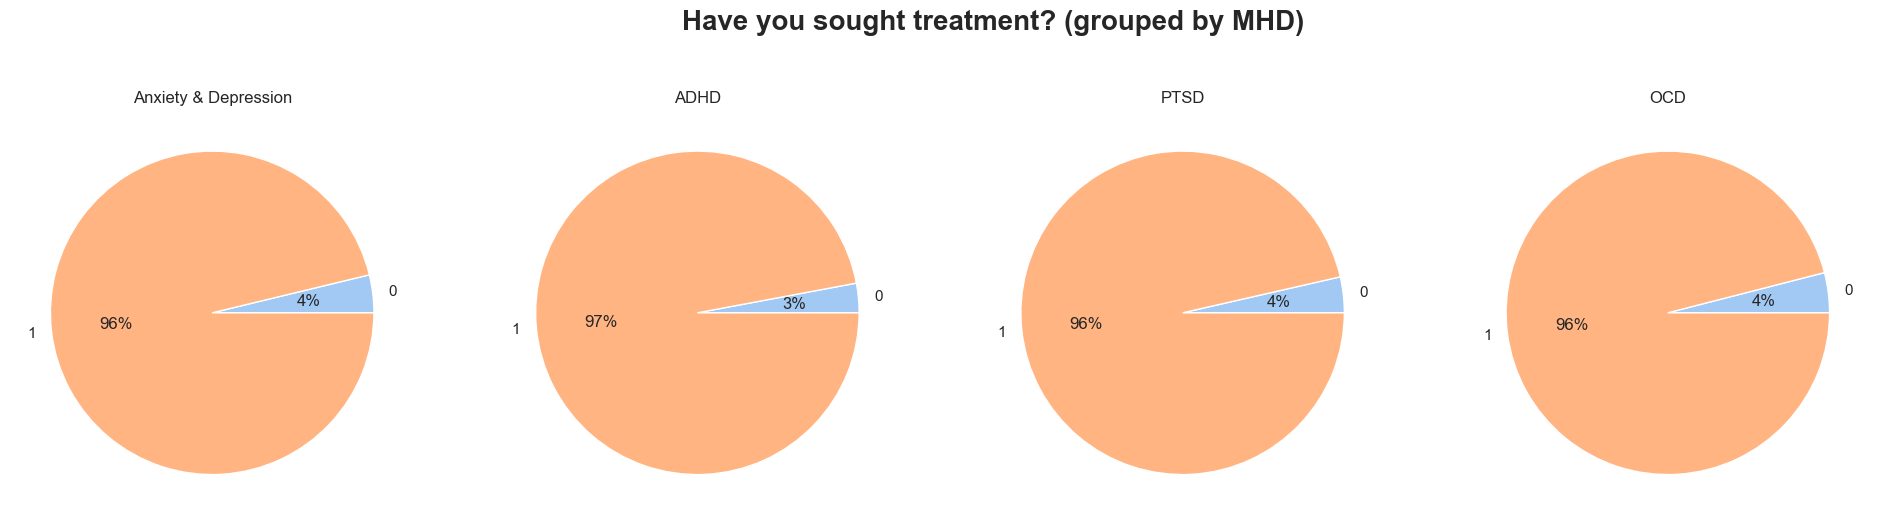

In [18]:
#Create sorted df for anxiety and depression
question = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
counts_anx_dep = df_anx_dep[question].value_counts()
counts_anx_dep = counts_anx_dep.reset_index().rename(columns={'count': "anx & dep treated"})
counts_anx_dep = counts_anx_dep.sort_values(by=[question]).reset_index(drop = True)

#Rename ADHD column
#counts_anx_dep = counts_anx_dep.rename(columns={question: 'anx & dep work interfer'})

#Create sorted df for ADHD population
counts_adhd = df_adhd[question].value_counts()
counts_adhd = counts_adhd.reset_index().rename(columns={0: "count"})
counts_adhd = counts_adhd.sort_values(by=[question]).reset_index(drop = True)

#Rename ADHD column
counts_adhd = counts_adhd.rename(columns={question: 'ADHD treated'})

#Create sorted df for PTSD population
counts_ptsd = df_ptsd[question].value_counts()
counts_ptsd = counts_ptsd.reset_index().rename(columns={ 0: "count"})
counts_ptsd = counts_ptsd.sort_values(by=[question]).reset_index(drop = True)

#Rename PTSD column
counts_ptsd = counts_ptsd.rename(columns={question: 'PTSD treated'})

#Create sorted df for OCD population
counts_ocd = df_ocd[question].value_counts()
counts_ocd = counts_ocd.reset_index().rename(columns={ 0: "count"})
counts_ocd = counts_ocd.sort_values(by=[question]).reset_index(drop = True)

#Rename OCD column
counts_ocd = counts_ocd.rename(columns={question: 'OCD treated'})

#Create master df and append ADHD columns
treated_counts = counts_anx_dep
treated_counts['ADHD treated'] = counts_adhd['count']
treated_counts['PTSD treated'] = counts_ptsd['count']
treated_counts['OCD treated'] = counts_ocd['count']

#To see all cross tabulation values
#work_interfer_counts

#Create visualtions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 12))
colors = sns.color_palette('pastel')[0:5]
sns.set(style="darkgrid")

a = ax1.pie(treated_counts['anx & dep treated'], labels = treated_counts[question], colors = colors, autopct='%.0f%%')
ax1.set_title('Anxiety & Depression', fontsize=12)

b = ax2.pie(treated_counts['ADHD treated'], labels = treated_counts[question], colors = colors, autopct='%.0f%%')
ax2.set_title('ADHD', fontsize=12)

c = ax3.pie(treated_counts['PTSD treated'], labels = treated_counts[question], colors = colors, autopct='%.0f%%')
ax3.set_title('PTSD', fontsize=12)

d = ax4.pie(treated_counts['OCD treated'], labels = treated_counts[question], colors = colors, autopct='%.0f%%')
ax4.set_title('OCD', fontsize=12)

plt.text(-2.25, 1.75, 'Have you sought treatment? (grouped by MHD)',weight='bold',
         horizontalalignment='right',fontsize=20)

Text(0.1, 1.75, 'Does your MHC interfer with Work when treated? (grouped by MHD)')

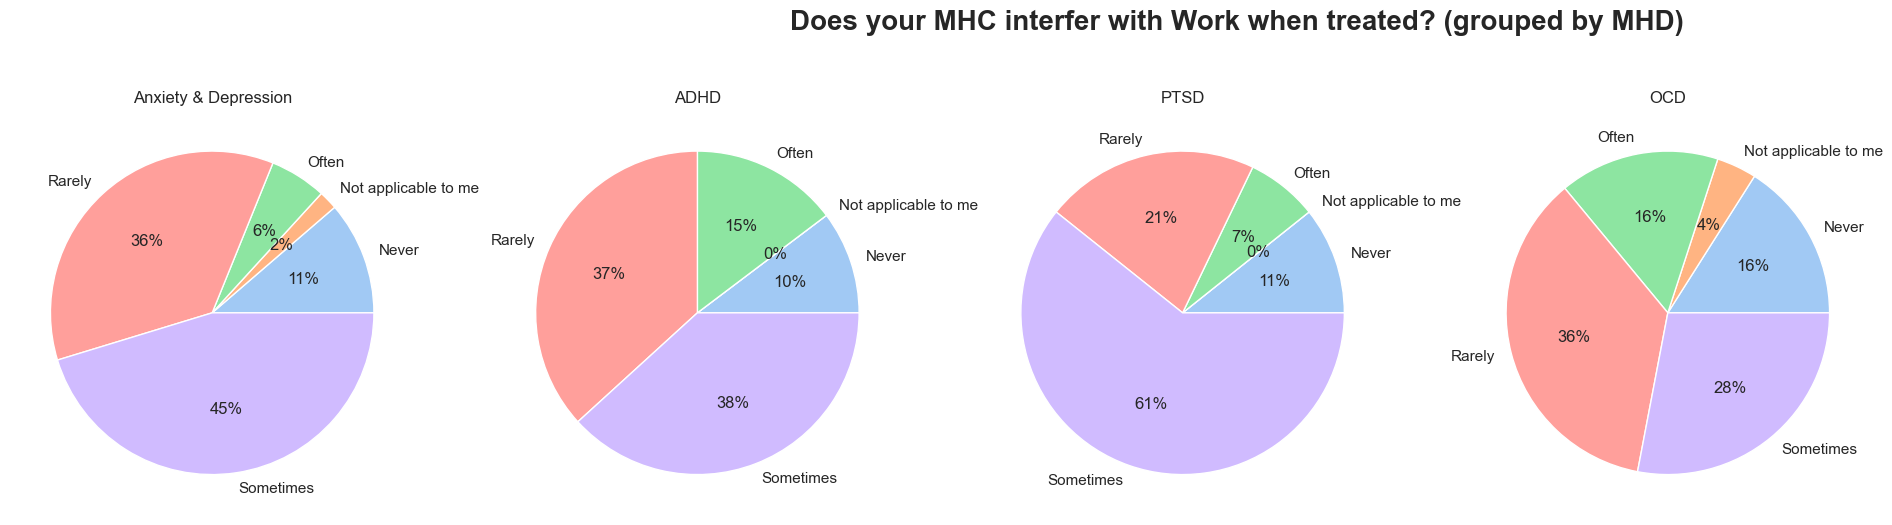

In [19]:
#Create sorted df for anxiety and depression
question = 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'
counts_anx_dep = df_anx_dep[question].value_counts()
counts_anx_dep = counts_anx_dep.reset_index().rename(columns={'count': "anx & dep work interfer"})
counts_anx_dep = counts_anx_dep.sort_values(by=[question]).reset_index(drop = True)

#Rename ADHD column
#counts_anx_dep = counts_anx_dep.rename(columns={question: 'anx & dep work interfer'})

#Create sorted df for ADHD population
counts_adhd = df_adhd[question].value_counts()
counts_adhd = counts_adhd.reset_index().rename(columns={0: "count"})
counts_adhd.loc[len(counts_adhd.index)] = ['Not applicable to me', 0] 
counts_adhd = counts_adhd.sort_values(by=[question]).reset_index(drop = True)

#Rename ADHD column
counts_adhd = counts_adhd.rename(columns={question: 'ADHD work interfer'})

#Create sorted df for PTSD population
counts_ptsd = df_ptsd[question].value_counts()
counts_ptsd = counts_ptsd.reset_index().rename(columns={ 0: "count"})
counts_ptsd.loc[len(counts_ptsd.index)] = ['Not applicable to me', 0] 
counts_ptsd = counts_ptsd.sort_values(by=[question]).reset_index(drop = True)

#Rename PTSD column
counts_ptsd = counts_ptsd.rename(columns={question: 'PTSD work interfer'})

#Create sorted df for OCD population
counts_ocd = df_ocd[question].value_counts()
counts_ocd = counts_ocd.reset_index().rename(columns={ 0: "count"})
counts_ocd = counts_ocd.sort_values(by=[question]).reset_index(drop = True)

#Rename OCD column
counts_ocd = counts_ocd.rename(columns={question: 'OCD work interfer'})

#Create master df and append ADHD columns
work_interfer_counts = counts_anx_dep
work_interfer_counts['ADHD work interfer'] = counts_adhd['count']
work_interfer_counts['PTSD work interfer'] = counts_ptsd['count']
work_interfer_counts['OCD work interfer'] = counts_ocd['count']

#To see all cross tabulation values
#work_interfer_counts

#Create visualtions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 12))
colors = sns.color_palette('pastel')[0:5]
sns.set(style="darkgrid")

a = ax1.pie(work_interfer_counts['anx & dep work interfer'], labels = work_interfer_counts[question], colors = colors, autopct='%.0f%%')
ax1.set_title('Anxiety & Depression', fontsize=12)

b = ax2.pie(work_interfer_counts['ADHD work interfer'], labels = work_interfer_counts[question], colors = colors, autopct='%.0f%%')
ax2.set_title('ADHD', fontsize=12)

c = ax3.pie(work_interfer_counts['PTSD work interfer'], labels = work_interfer_counts[question], colors = colors, autopct='%.0f%%')
ax3.set_title('PTSD', fontsize=12)

d = ax4.pie(work_interfer_counts['OCD work interfer'], labels = work_interfer_counts[question], colors = colors, autopct='%.0f%%')
ax4.set_title('OCD', fontsize=12)

plt.text(.1, 1.75, 'Does your MHC interfer with Work when treated? (grouped by MHD)',weight='bold',
         horizontalalignment='right',fontsize=20)

Text(0.2, 1.75, 'Does your MHC interfer with Work when not treated? (grouped by MHC)')

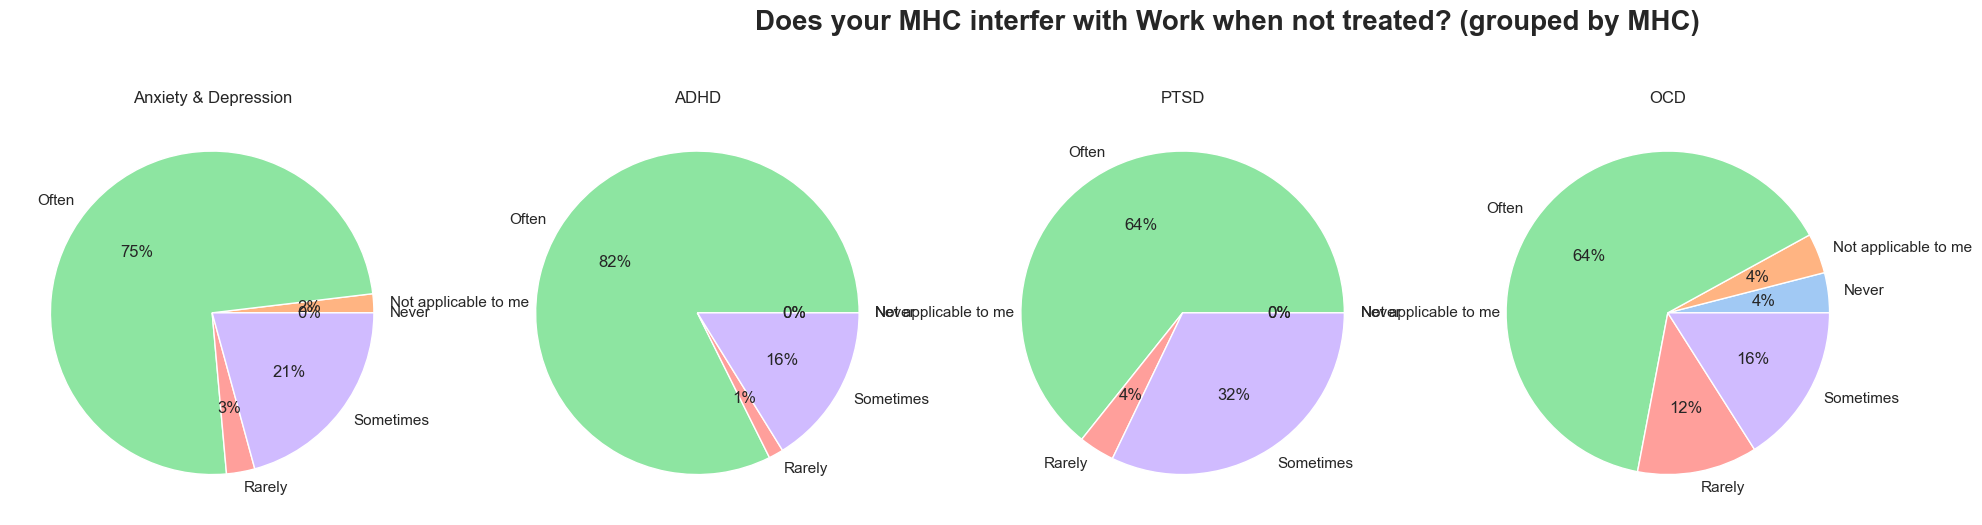

In [20]:
#Create sorted df for anxiety and depression
question = 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
counts_anx_dep = df_anx_dep[question].value_counts()
counts_anx_dep = counts_anx_dep.reset_index().rename(columns={'count': 'anx & dep work interfer (not treated)'})
counts_anx_dep.loc[len(counts_anx_dep.index)] = ['Never', 0] 
counts_anx_dep = counts_anx_dep.sort_values(by=[question]).reset_index(drop = True)

#Rename anx and dep column
#counts_anx_dep = counts_anx_dep.rename(columns={'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'anx & dep work interfer (not treated)'})

#Create sorted df for ADHD population
counts_adhd = df_adhd[question].value_counts()
counts_adhd = counts_adhd.reset_index().rename(columns={0: 'ADHD work interfer (not treated)'})
counts_adhd.loc[len(counts_adhd.index)] = ['Not applicable to me', 0] 
counts_adhd.loc[len(counts_adhd.index)] = ['Never', 0] 
counts_adhd = counts_adhd.sort_values(by=[question]).reset_index(drop = True)

#Rename ADHD column
counts_adhd = counts_adhd.rename(columns={question: 'ADHD work interfer (not treated)'})

#Create sorted df for PTSD population
counts_ptsd = df_ptsd[question].value_counts()
counts_ptsd = counts_ptsd.reset_index().rename(columns={ 0: 'PTSD work interfer (not treated)'})
counts_ptsd.loc[len(counts_ptsd.index)] = ['Not applicable to me', 0] 
counts_ptsd.loc[len(counts_ptsd.index)] = ['Never', 0]
counts_ptsd = counts_ptsd.sort_values(by=[question]).reset_index(drop = True)

#Rename PTSD column
counts_ptsd = counts_ptsd.rename(columns={question: 'PTSD work interfer (not treated)'})


#Create sorted df for OCD population
counts_ocd = df_ocd[question].value_counts()
counts_ocd = counts_ocd.reset_index().rename(columns={ 0: 'OCD work interfer (not treated)'})
counts_ocd = counts_ocd.sort_values(by=[question]).reset_index(drop = True)

#Rename OCD column
counts_ocd = counts_ocd.rename(columns={question: 'OCD work interfer (not treated)'})

#Create master df and append ADHD columns
work_interfer_not_treated = counts_anx_dep
work_interfer_not_treated['ADHD work interfer (not treated)'] = counts_adhd['count']
work_interfer_not_treated['PTSD work interfer (not treated)'] = counts_ptsd['count']
work_interfer_not_treated['OCD work interfer (not treated)'] = counts_ocd['count']

#To see cross tabulation values
#work_interfer_not_treated

#Create visualizations
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 12))
colors = sns.color_palette('pastel')[0:5]

a = ax1.pie(work_interfer_not_treated['anx & dep work interfer (not treated)'], labels = work_interfer_not_treated[question], colors = colors, autopct='%.0f%%')
ax1.set_title('Anxiety & Depression', fontsize=12)

b = ax2.pie(work_interfer_not_treated['ADHD work interfer (not treated)'], labels = work_interfer_not_treated[question], colors = colors, autopct='%.0f%%')
ax2.set_title('ADHD', fontsize=12)

c = ax3.pie(work_interfer_not_treated['PTSD work interfer (not treated)'], labels = work_interfer_not_treated[question], colors = colors, autopct='%.0f%%')
ax3.set_title('PTSD', fontsize=12)

d = ax4.pie(work_interfer_not_treated['OCD work interfer (not treated)'], labels = work_interfer_not_treated[question], colors = colors, autopct='%.0f%%')
ax4.set_title('OCD', fontsize=12)

plt.text(.2, 1.75, 'Does your MHC interfer with Work when not treated? (grouped by MHC)',weight='bold',
         horizontalalignment='right',fontsize=20)

Mental health perception score

In [21]:
#Change question answers based on a scoring system for Mental Health perception in the workplace
#Each question needs to be manually reviewed and assigned a score
#The higher the score, the more positive the perception is about mental health in the workplace
question0 = 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
df1[question0] = df1[question0].replace('Very easy', 2)
df1[question0] = df1[question0].replace('Somewhat easy', 1)
df1[question0] = df1[question0].replace('Neither easy nor difficult', 0)
df1[question0] = df1[question0].replace('I don\'t know', 0)
df1[question0] = df1[question0].replace('Somewhat difficult', -1)
df1[question0] = df1[question0].replace('Very difficult', -2)

question1 = 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
df1[question1] = df1[question1].replace('No', 2)
df1[question1] = df1[question1].replace('Maybe', 0)
df1[question1] = df1[question1].replace('Yes', -2)

question2 = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
df1[question2] = df1[question2].replace('Yes', 2)
df1[question2] = df1[question2].replace('Maybe', 0)
df1[question2] = df1[question2].replace('No', -2)

question3 = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'
df1[question3] = df1[question3].replace('Yes', 2)
df1[question3] = df1[question3].replace('Maybe', 0)
df1[question3] = df1[question3].replace('No', -2)

question4 = 'Do you feel that your employer takes mental health as seriously as physical health?'
df1[question4] = df1[question4].replace('Yes', 2)
df1[question4] = df1[question4].replace('I don\'t know', 0)
df1[question4] = df1[question4].replace('No', -2)

question5 = 'Would you bring up a mental health issue with a potential employer in an interview?'
df1[question5] = df1[question5].replace('Yes', 2)
df1[question5] = df1[question5].replace('Maybe', 0)
df1[question5] = df1[question5].replace('No', -2)

question6 = 'Do you feel that being identified as a person with a mental health issue would hurt your career?'
df1[question6] = df1[question6].replace('No, it has not', 2)
df1[question6] = df1[question6].replace('No, I don\'t think it would', 1)
df1[question6] = df1[question6].replace('Maybe', 0)
df1[question6] = df1[question6].replace('Yes, I think it would', -1)
df1[question6] = df1[question6].replace('Yes, it has', -2)

question7 = 'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'
df1[question7] = df1[question7].replace('No, they do not', 2)
df1[question7] = df1[question7].replace('No, I don\'t think they would', 1)
df1[question7] = df1[question7].replace('Maybe', 0)
df1[question7] = df1[question7].replace('Yes, I think they would', -1)
df1[question7] = df1[question7].replace('Yes, they do', -2)

question8 = 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
df1[question8] = df1[question8].replace('Yes', 2)
df1[question8] = df1[question8].replace('I don\'t know', 0)
df1[question8] = df1[question8].replace('No', -2)

question9 = 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
df1[question9] = df1[question9].replace('Very easy', 2)
df1[question9] = df1[question9].replace('Somewhat easy', 1)
df1[question9] = df1[question9].replace('Neither easy nor difficult', 0)
df1[question9] = df1[question9].replace('I don\'t know', 0)
df1[question9] = df1[question9].replace('Somewhat difficult', -1)
df1[question9] = df1[question9].replace('Very difficult', -2)

question10 = 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
df1[question10] = df1[question10].replace('No', 2)
df1[question10] = df1[question10].replace('Maybe', 0)
df1[question10] = df1[question10].replace('Yes', -2)

question11 = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
df1[question11] = df1[question11].replace('Yes', 2)
df1[question11] = df1[question11].replace('Maybe', 0)
df1[question11] = df1[question11].replace('No', -2)

question12 = 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'
df1[question12] = df1[question12].replace('Yes', 2)
df1[question12] = df1[question12].replace('Maybe', 0)
df1[question12] = df1[question12].replace('No', -2)

question13 = 'Do you feel that your employer takes mental health as seriously as physical health?'
df1[question13] = df1[question13].replace('Yes', 2)
df1[question13] = df1[question13].replace('I don\'t know', 0)
df1[question13] = df1[question13].replace('No', -2)

question14 = 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'
df1[question14] = df1[question14].replace('None of them', 2)
df1[question14] = df1[question14].replace('I don\'t know', 0)
df1[question14] = df1[question14].replace('Some of them', 0)
df1[question14] = df1[question14].replace('Yes, all of them', -2)

question15 = 'Would you have been willing to discuss a mental health issue with your previous co-workers?'
df1[question15] = df1[question15].replace('Yes, at all of my previous employers', 2)
df1[question15] = df1[question15].replace('Some of my previous employers', 0)
df1[question15] = df1[question15].replace('No, at none of my previous employers', -2)

question16 = 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'
df1[question16] = df1[question16].replace('Yes, at all of my previous employers', 2)
df1[question16] = df1[question16].replace('Some of my previous employers', 0)
df1[question16] = df1[question16].replace('I don\'t know', 0)
df1[question16] = df1[question16].replace('No, at none of my previous employers', -2)

question17 = 'Did you feel that your previous employers took mental health as seriously as physical health?'
df1[question17] = df1[question17].replace('Yes, they all did', 2)
df1[question17] = df1[question17].replace('I don\'t know', 0)
df1[question17] = df1[question17].replace('Some did', 0)
df1[question17] = df1[question17].replace('None did', -2)

df1[question0] = pd.to_numeric(df1[question0])
df1[question1] = pd.to_numeric(df1[question1])
df1[question2] = pd.to_numeric(df1[question2])
df1[question3] = pd.to_numeric(df1[question3])
df1[question4] = pd.to_numeric(df1[question4])
df1[question5] = pd.to_numeric(df1[question5])
df1[question6] = pd.to_numeric(df1[question6])
df1[question7] = pd.to_numeric(df1[question7])
df1[question8] = pd.to_numeric(df1[question8])
df1[question9] = pd.to_numeric(df1[question9])
df1[question10] = pd.to_numeric(df1[question10])
df1[question11] = pd.to_numeric(df1[question11])
df1[question12] = pd.to_numeric(df1[question12])
df1[question13] = pd.to_numeric(df1[question13])
df1[question14] = pd.to_numeric(df1[question14])
df1[question15] = pd.to_numeric(df1[question15])
df1[question16] = pd.to_numeric(df1[question16])
df1[question17] = pd.to_numeric(df1[question17])

#Calculate the scores for whole population
df1['Mental Health Perception Score'] = df1[[question0, question1, question2, question3, question4, 
                                            question5, question6, question7, question8, question9,
                                            question10, question11, question12, question13, question14,
                                            question15, question16, question17]].sum(axis=1)

C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\724063190.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[question0] = df1[question0].replace('Very difficult', -2)
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\724063190.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[question1] = df1[question1].replace('Yes', -2)
C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\724063190.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

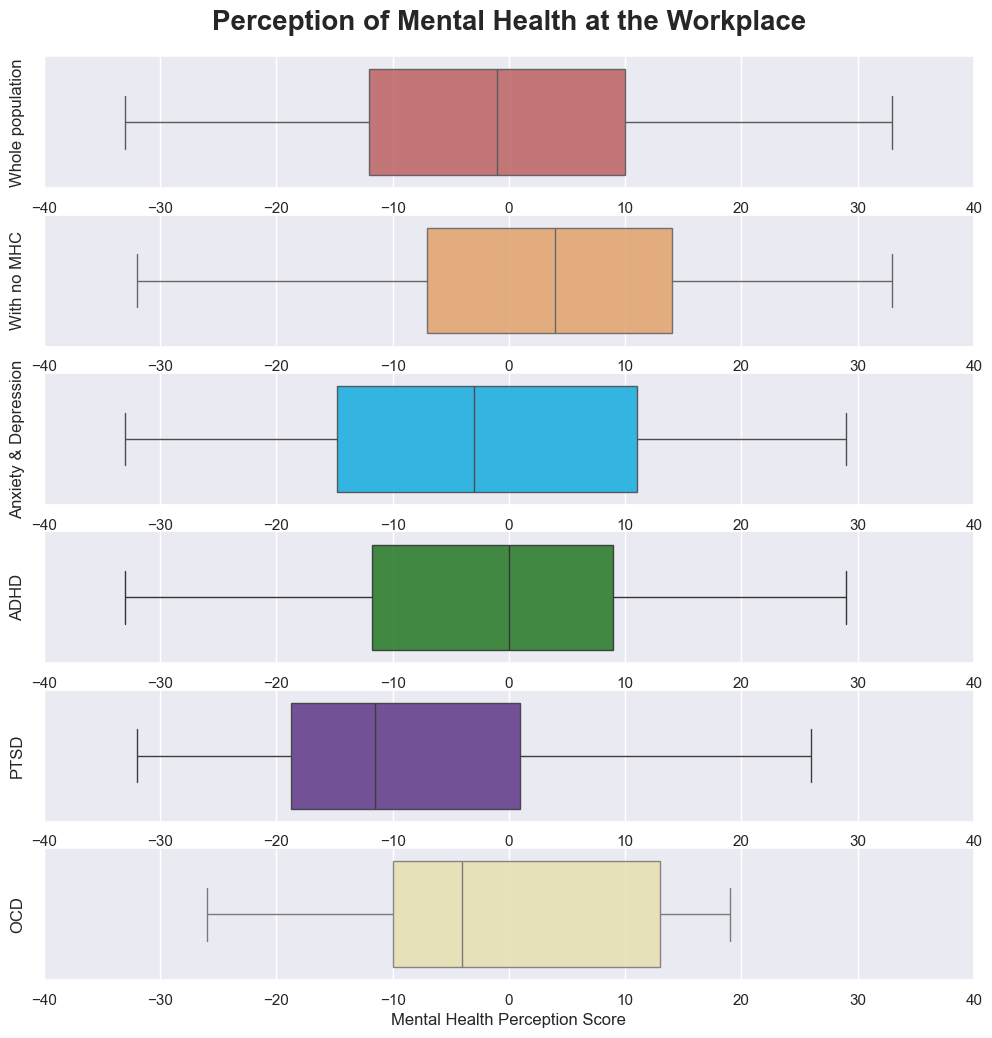

In [22]:
#Filter by MHC to see variance of scores
df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]

#boxplots of scores
sns.set(style="darkgrid")
boxprops=dict(alpha=.9)


fig, axs = plt.subplots(6, 1, figsize=(12, 12))
(ax1, ax2, ax3, ax4, ax5, ax6) = axs

ax1 = sns.boxplot(data = df1, x = 'Mental Health Perception Score', color = 'indianred',
                  ax=axs[0], boxprops=boxprops)
ax1.set_xlim(-40,40)
ax1.set(ylabel = 'Whole population')

ax2 = sns.boxplot(data = df_no_MHD, x = 'Mental Health Perception Score', color = 'sandybrown',
                  ax=axs[1], boxprops=boxprops)
ax2.set_xlim(-40,40)
ax2.set(ylabel = 'With no MHC')

ax3 = sns.boxplot(data = df_anx_dep, x = 'Mental Health Perception Score', color = 'deepskyblue',
                  ax=axs[2], boxprops=boxprops)
ax3.set_xlim(-40,40)
ax3.set(ylabel = 'Anxiety & Depression')

ax4 = sns.boxplot(data = df_adhd, x = 'Mental Health Perception Score', color = 'forestgreen',
                  ax=axs[3], boxprops=boxprops)
ax4.set_xlim(-40,40)
ax4.set(ylabel = 'ADHD')

ax5 = sns.boxplot(data = df_ptsd, x = 'Mental Health Perception Score', color = 'rebeccapurple',
                  ax=axs[4], boxprops=boxprops)
ax5.set_xlim(-40,40)
ax5.set(ylabel = 'PTSD')

ax6 = sns.boxplot(data = df_ocd, x = 'Mental Health Perception Score', color = 'palegoldenrod',
                  ax=axs[5], boxprops=boxprops)
ax6.set_xlim(-40,40)
ax6.set(ylabel = 'OCD')


plt.text(.5, 1.2, 'Perception of Mental Health at the Workplace',weight='bold',horizontalalignment='center',fontsize=20,transform = ax1.transAxes)
plt.show()

In [23]:
#statistics of mental health perception score among groups
df_score_stats = pd.DataFrame({'Whole Population': df1['Mental Health Perception Score'].describe()})
df_score_stats = df_score_stats.reset_index()
df_score_stats['No MHC'] = df_no_MHD['Mental Health Perception Score'].describe().reset_index()['Mental Health Perception Score']
df_score_stats['Anxiety & Depression'] = df_anx_dep['Mental Health Perception Score'].describe().reset_index()['Mental Health Perception Score']
df_score_stats['ADHD'] = df_adhd['Mental Health Perception Score'].describe().reset_index()['Mental Health Perception Score']
df_score_stats['PTSD'] = df_ptsd['Mental Health Perception Score'].describe().reset_index()['Mental Health Perception Score']
df_score_stats['OCD'] = df_ocd['Mental Health Perception Score'].describe().reset_index()['Mental Health Perception Score']
df_score_stats

,index,Whole Population,No MHC,Anxiety & Depression,ADHD,PTSD,OCD
0,count,539.000000,174.000000,106.000000,68.000000,28.000000,25.000000
1,mean,-0.784787,3.143678,-2.367925,-2.000000,-8.464286,-1.520000
2,std,14.562839,14.133429,15.458285,14.967627,15.654800,14.204225
3,min,-33.000000,-32.000000,-33.000000,-33.000000,-32.000000,-26.000000
4,25%,-12.000000,-7.000000,-14.750000,-11.750000,-18.750000,-10.000000
5,50%,-1.000000,4.000000,-3.000000,0.000000,-11.500000,-4.000000
6,75%,10.000000,14.000000,11.000000,9.000000,1.000000,13.000000
7,max,33.000000,33.000000,29.000000,29.000000,26.000000,19.000000


Machine Learning to Predict Score

In [24]:
# Work in progress
#Preprocessing for modeling
df_predict = df1.copy()

#Remove columns used to generate Mental Health Perception Score
df_predict = df_predict.drop(df_predict.columns[9:45], axis = 1)

#Remove the columns used to filter the group to US, tech workers, not self-employed, mostly empty, and non relevant columns
df_predict = df_predict.drop(columns = ['Are you self-employed?',
                                        'Is your employer primarily a tech company/organization?',
                                        'What country do you live in?',
                                        'What country do you work in?',
                                        'What US state or territory do you live in?',
                                        'What US state or territory do you work in?',
                                        'Have you had a mental health disorder in the past?',
                                        'Do you currently have a mental health disorder?', 
                                        'If yes, what condition(s) have you been diagnosed with?',
                                        'If maybe, what condition(s) do you believe you have?',
                                        'Have you been diagnosed with a mental health condition by a medical professional?',
                                        'If so, what condition(s) were you diagnosed with?',
                                        'Is your primary role within your company related to tech/IT?',
                                        'How many employees does your company or organization have?'])

#Remove MHCs with low count
df_predict = df_predict.drop(df_predict.columns[18:33], axis = 1)

#Remove for now
df_predict = df_predict.drop(columns = ['Which of the following best describes your work position?'])

#Replace nan values
question = 'Do you know the options for mental health care available under your employer-provided coverage?'
df_predict[question] = df_predict[question].fillna('N/A')

question = 'What is your gender?'
df_predict[question] = df_predict[question].fillna('N/A')

#Replace nan values in the mhc columns
df_predict = df_predict.fillna('N/A')

#Print columns used to predict Mental Health Score
for i in df_predict.columns:
    print(i)

Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
Do you have a family history of mental illness?
Have you ever sought treatment for a mental health issue from a mental health professional?
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
What is your age?
What is your gender?
Do you work remotely?
Anxie

In [25]:
#Dummy encoding

prefix = 'employer_provide_mh_benefits'
question = 'Does your employer provide mental health benefits as part of healthcare coverage?'
dummy0 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy0 = dummy0.drop(columns = [(prefix + '_' + 'Not eligible for coverage / N/A')])

prefix = 'know_mh_care_options'
question = 'Do you know the options for mental health care available under your employer-provided coverage?'
dummy1 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy1 = dummy1.drop(columns = [(prefix + '_' + 'N/A')])

prefix = 'employee_discuss_mh'
question = 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
dummy2 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy2 = dummy2.drop(columns = [(prefix + '_' + 'I don\'t know')])

prefix = 'employee_resources_mh'
question = 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
dummy3 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy3 = dummy3.drop(columns = [(prefix + '_' + 'I don\'t know')])

prefix = 'family_history_mh'
question = 'Do you have a family history of mental illness?'
dummy4 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy4 = dummy4.drop(columns = [(prefix + '_' + 'I don\'t know')])

prefix = 'mhc_work_interfer_treated'
question = 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'
dummy5 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy5 = dummy5.drop(columns = [(prefix + '_' + 'Not applicable to me')])

prefix = 'mhc_work_interfer_nottreated'
question = 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
dummy6 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy6 = dummy6.drop(columns = [(prefix + '_' + 'Not applicable to me')])

prefix = 'gender'
question = 'What is your gender?'
dummy7 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy7 = dummy7.drop(columns = [(prefix + '_' + 'N/A')])

prefix = 'remote'
question = 'Do you work remotely?'
dummy8 = pd.get_dummies(df_predict[question],prefix = prefix, drop_first = False)
dummy8 = dummy8.drop(columns = [(prefix + '_' + 'Never')])

In [26]:
#Drop original columns that will be dummy encoded
df_predict = df_predict.drop(df_predict.columns[0:4], axis = 1)

question = 'Do you have a family history of mental illness?'
df_predict = df_predict.drop(columns = [question])

question = 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'
df_predict = df_predict.drop(columns = [question])

question = 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
df_predict = df_predict.drop(columns = [question])

question = 'What is your gender?'
df_predict = df_predict.drop(columns = [question])

question = 'Do you work remotely?'
df_predict = df_predict.drop(columns = [question])

In [27]:
#add dummy columns to main df
df_predict = df_predict.replace(['N/A'], False)

df_predict_rdy = pd.concat([df_predict, dummy0, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8], axis =1)

C:\Users\masukumec\AppData\Local\Temp\ipykernel_40744\3949649476.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_predict = df_predict.replace(['N/A'], False)


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statistics as s 

y = df_predict_rdy['Mental Health Perception Score']
X = df_predict_rdy.drop(columns = ['Mental Health Perception Score'])

model = LinearRegression()
cross_val = cross_val_score(model, X, y, cv = 4, scoring = 'neg_mean_absolute_error')
cross_val_avg = s.mean(cross_val)

performance = str(round(cross_val_avg,2)) + ' +/- ' + str(round((cross_val.max()-cross_val_avg),2))
print( 'Linear Regression Model')
print( 'Negative mean absolute error is ' + performance)

Linear Regression Model
Negative mean absolute error is -11.47 +/- 1.38


In [29]:
#Turn into classification problem
df_a = df_predict_rdy.loc[(df_predict_rdy['Mental Health Perception Score'] > 0)].reset_index()
df_a['Mental Health Perception'] = 1

df_b = df_predict_rdy.loc[(df_predict_rdy['Mental Health Perception Score'] < 0)].reset_index()
df_b['Mental Health Perception'] = 0
df_predict_rdy_classification = pd.concat([df_a, df_b])

df_predict_rdy_classification = df_predict_rdy_classification.sample(frac=1).reset_index(drop=True)

In [30]:


y = df_predict_rdy_classification['Mental Health Perception']
X = df_predict_rdy_classification.drop(columns = ['Mental Health Perception Score', 'Mental Health Perception'])



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#model
model = LogisticRegression(max_iter=3000)

#performance metrics
accuracy = cross_val_score(model, X, y, cv=4)
avg_accuracy = np.mean(accuracy)
print('Accuracy:', round((avg_accuracy)*100,2), '%', '+/-', round((max(accuracy)-avg_accuracy)*100,2), '%')

recall = cross_val_score(model, X, y, scoring = 'recall', cv= 4)
avg_recall = np.mean(recall)
print('Recall:', round((avg_recall)*100,2), '%', '+/-', round((max(recall)-avg_recall)*100,2), '%')

precision = cross_val_score(model, X, y, scoring = 'precision', cv= 4)
avg_precsion = np.mean(precision)
print('Precision:', round((avg_precsion)*100,2), '%', '+/-', round((max(precision)-avg_precsion)*100,2), '%')

Accuracy: 62.34 % +/- 4.08 %


Recall: 56.64 % +/- 9.49 %


Precision: 61.08 % +/- 2.98 %


AUC: 71.6 %


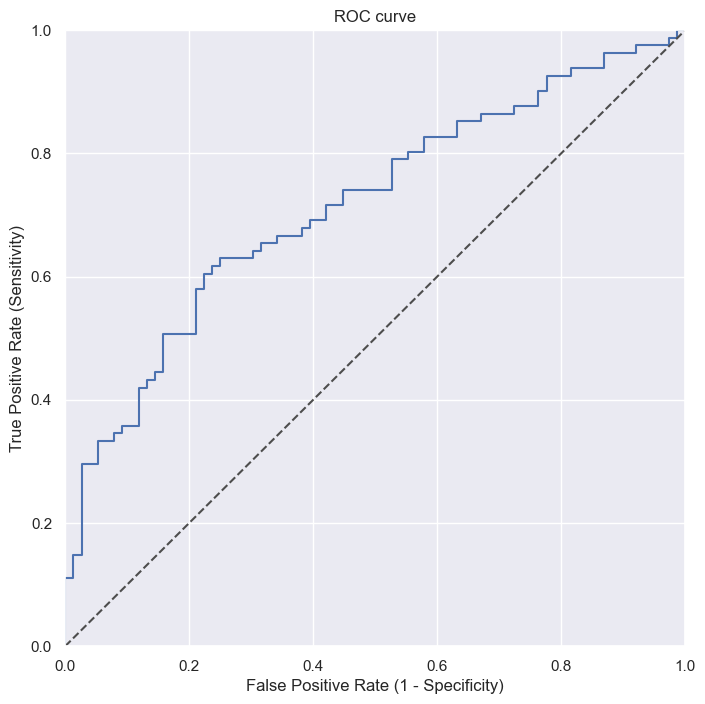

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#the model
model = LogisticRegression(max_iter=3000)
      
#fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]

#ROC graph x and y axis
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
print('AUC:', round((auc(fpr, tpr))*100,2), '%')

#plot the ROC graph
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)